<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Practice Bayesian Modeling on Auto Data

_Authors: Kiefer Katovich (SF)_

---

In this lab you will get some practice building models with `pymc3`. Please reference the preceding lecture on estimation and regression with `pmc3` for tips on how to code these models up!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 1. Load the auto data. Perform any cleaning or EDA necessary.

In [3]:
auto = pd.read_csv('../datasets/Auto.csv')

In [4]:
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [5]:
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
print auto.horsepower.unique()
auto.horsepower = auto.horsepower.map(lambda x: np.nan if x == '?' else float(x))
auto.isnull().sum()

['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [8]:
auto.dropna(inplace=True)

### 2. Create columns indicating if the car brand is from the USA, Asia, or Europe.

In [9]:
auto['maker'] = auto.name.map(lambda x: x.split()[0])
auto['maker'].value_counts()

ford             48
chevrolet        43
plymouth         31
dodge            28
amc              27
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
peugeot           8
fiat              8
audi              7
volvo             6
vw                6
chrysler          6
saab              4
opel              4
subaru            4
renault           3
chevy             3
maxda             2
mercedes-benz     2
bmw               2
cadillac          2
mercedes          1
nissan            1
capri             1
toyouta           1
hi                1
vokswagen         1
chevroelt         1
triumph           1
Name: maker, dtype: int64

In [10]:
auto.maker.unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [11]:
american = ['chevrolet','buick','plymouth','amc','ford','pontiac','dodge',
            'chevy','oldsmobile','chrysler','chevroelt','cadillac','triumph']
euro = ['volkswagen','peugeot','audi','saab','bmw','fiat','volvo','renualt','vw',
        'mercedes-benz','mercedes','vokswagen']
asian = ['toyota','datsum','mazda','toyouta','maxda','honda','subaru','nissan']

In [12]:
auto['american'] = auto.maker.map(lambda x: 1 if x in american else 0)
auto['euro'] = auto.maker.map(lambda x: 1 if x in euro else 0)
auto['asian'] = auto.maker.map(lambda x: 1 if x in asian else 0)

In [13]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,american,euro,asian
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,0.594388,0.153061,0.142857
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,0.491638,0.360507,0.350374
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,0.000000,0.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000,1.000000,1.000000


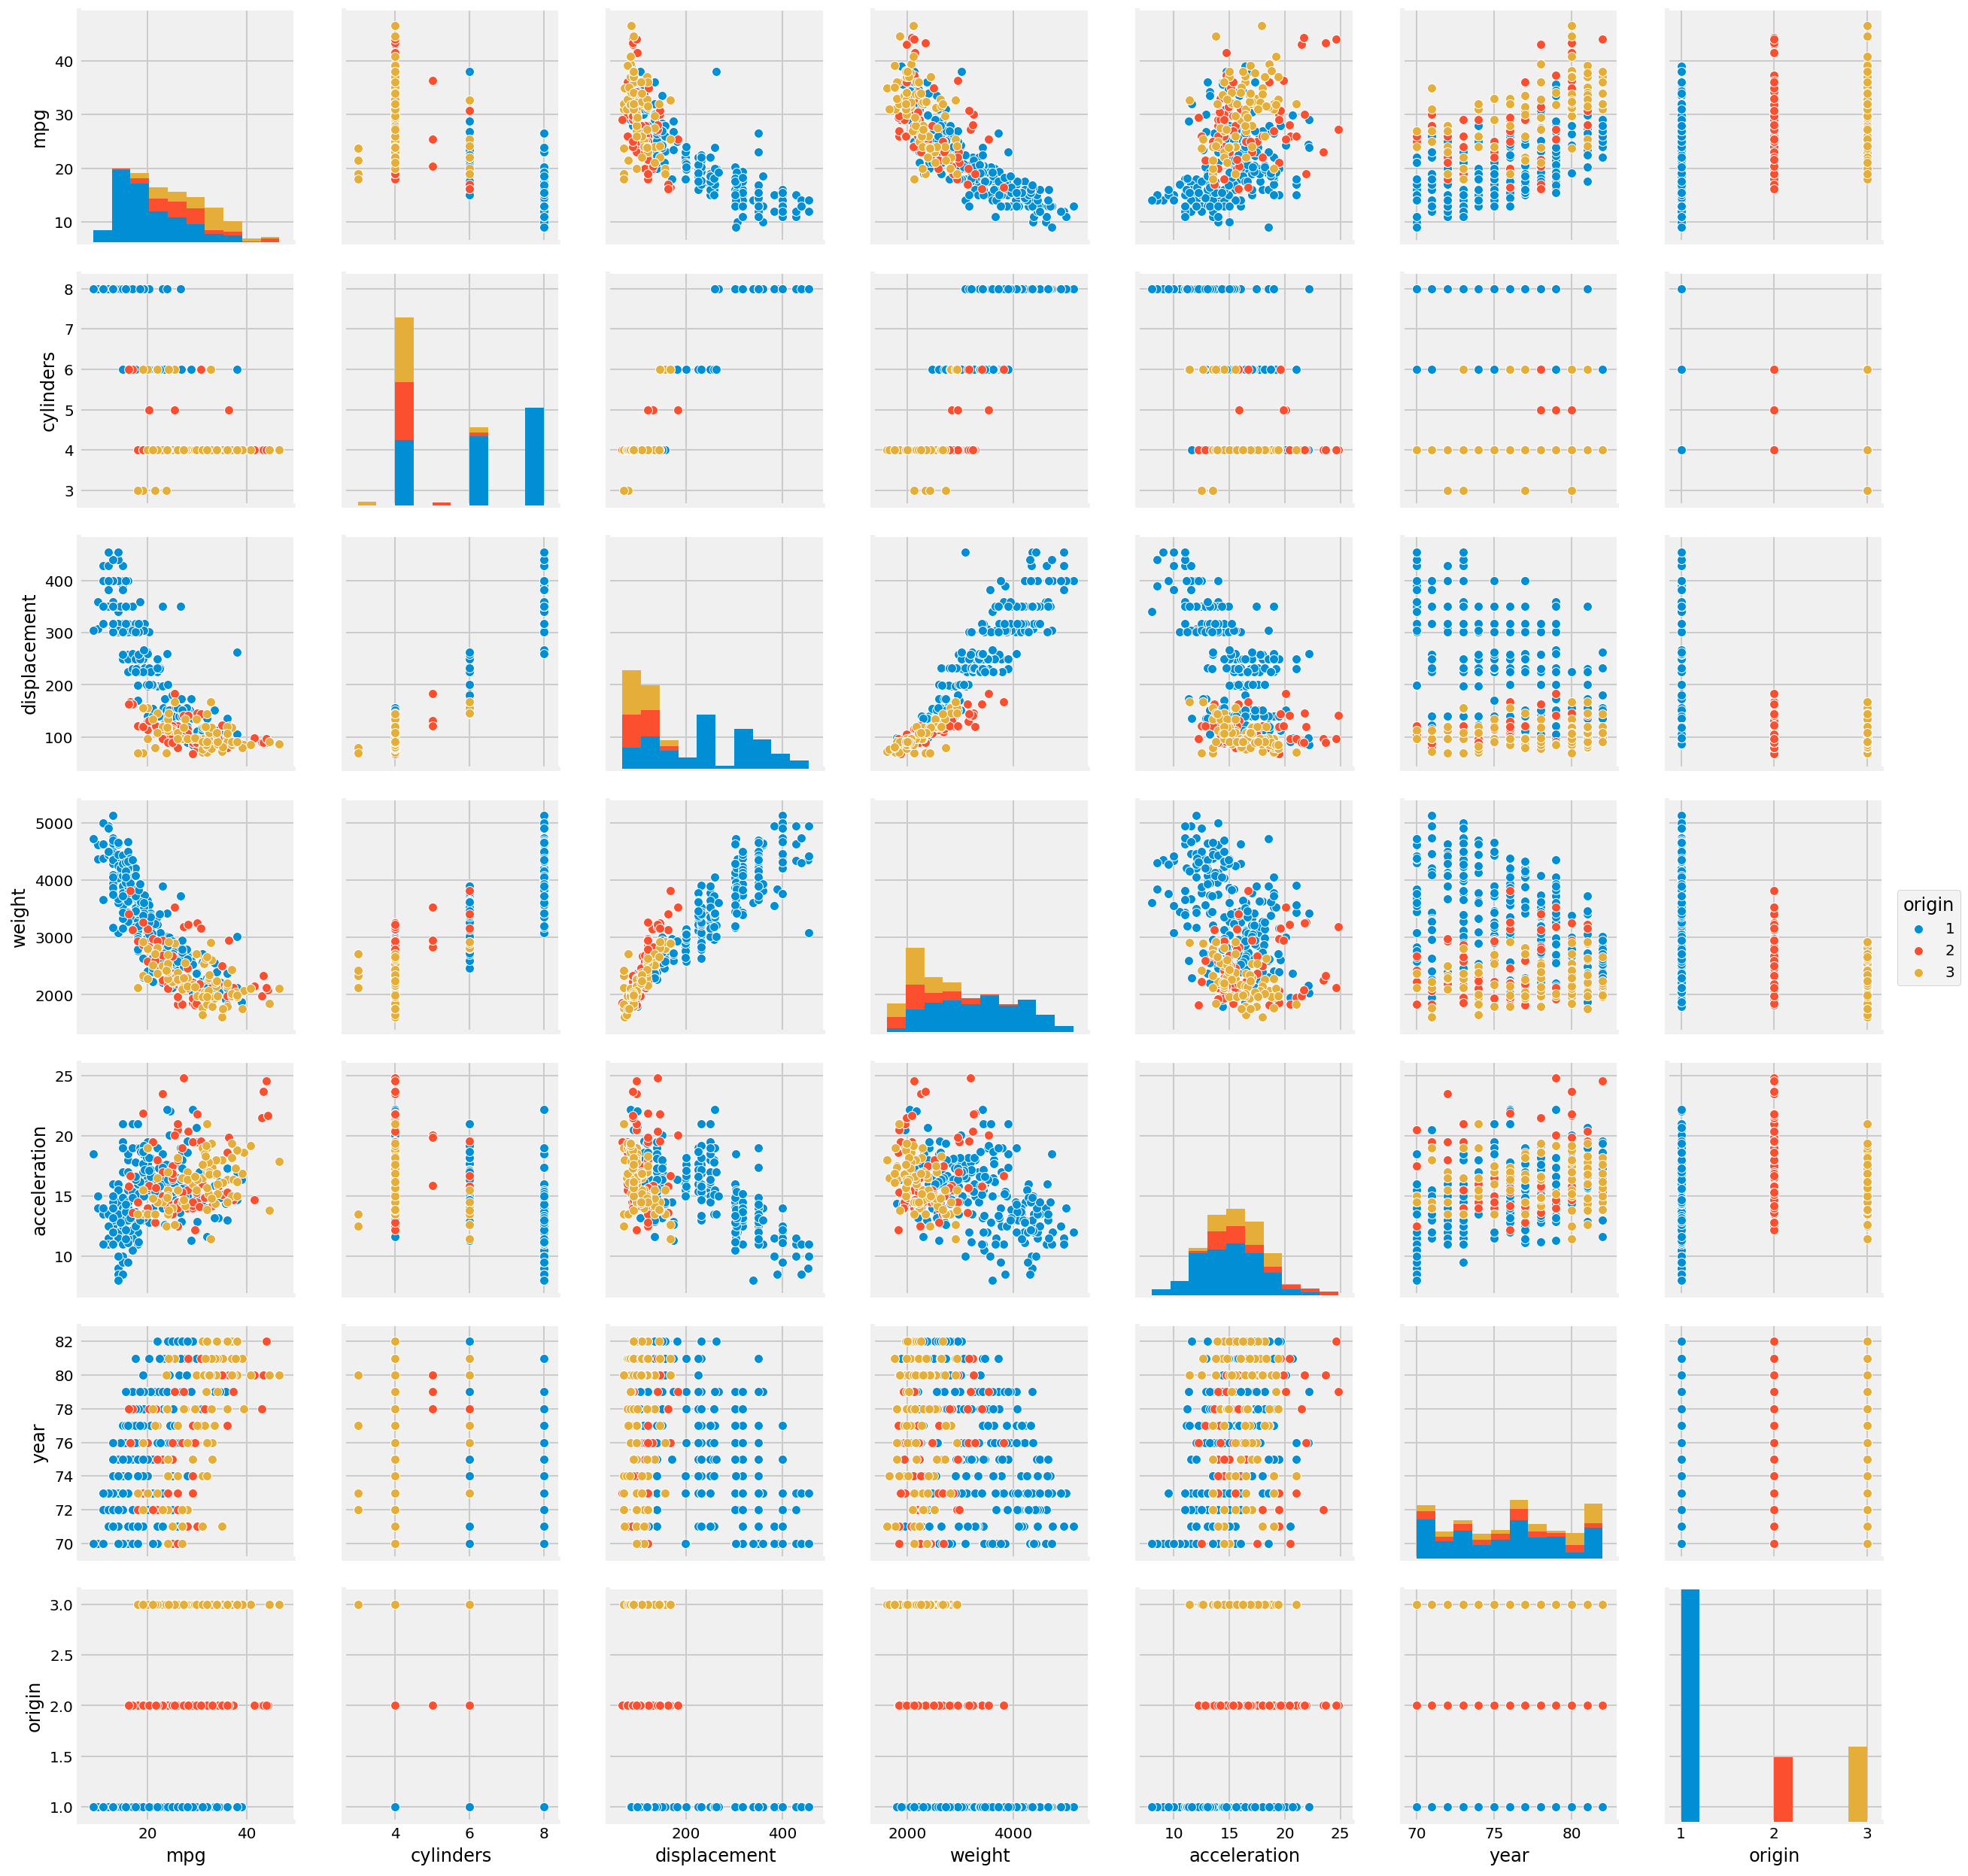

In [14]:
sns.pairplot(auto[['mpg','cylinders','displacement','weight','acceleration','year','origin']], hue='origin')

### 3. Build a model with `pymc3` to estimate the difference in MPG between American and European cars.

Make sure to inspect the results visually using `pymc3`'s built-in plotting functions.

In [15]:
american_mpg = auto[auto.american == 1].mpg.values
european_mpg = auto[auto.euro == 1].mpg.values

print american_mpg.mean(), european_mpg.mean()

20.166952789699568 27.5


In [16]:
import pymc3 as pm

/Users/edoardo/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [17]:
prior_mean = auto.mpg.mean()
prior_std = auto.mpg.std()
print prior_mean, prior_std

23.4459183673 7.80500748657


In [18]:
with pm.Model() as model:
    
    usa_mean = pm.Normal('usa_mean', prior_mean, sd=50)
    euro_mean = pm.Normal('euro_mean', prior_mean, sd=50)
    
    usa_std = pm.Gamma('usa_std', mu=prior_std, sd=50)
    euro_std = pm.Gamma('euro_std', mu=prior_std, sd=50)
    
    usa_mpg = pm.Normal('usa_mpg', mu=usa_mean, sd=usa_std, observed=american_mpg)
    euro_mpg = pm.Normal('euro_mpg', mu=euro_mean, sd=euro_std, observed=european_mpg)
    
    mean_delta = pm.Deterministic('mean_delta', usa_mean - euro_mean)
    std_delta = pm.Deterministic('std_delta', usa_std - euro_std)
    effect_size = pm.Deterministic('effect_size', mean_delta / np.sqrt((usa_std**2 + euro_std**2)/2.))
    

In [19]:
with model:
    step = pm.NUTS()
    start = pm.find_MAP()
    trace = pm.sample(50000, start=start, step=step, njobs=4)

logp = -991.68, ||grad|| = 4.1324: 100%|██████████| 21/21 [00:00<00:00, 688.99it/s]  
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [euro_std_log__, usa_std_log__, euro_mean, usa_mean]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1263b99d0>,
      dtype=object)

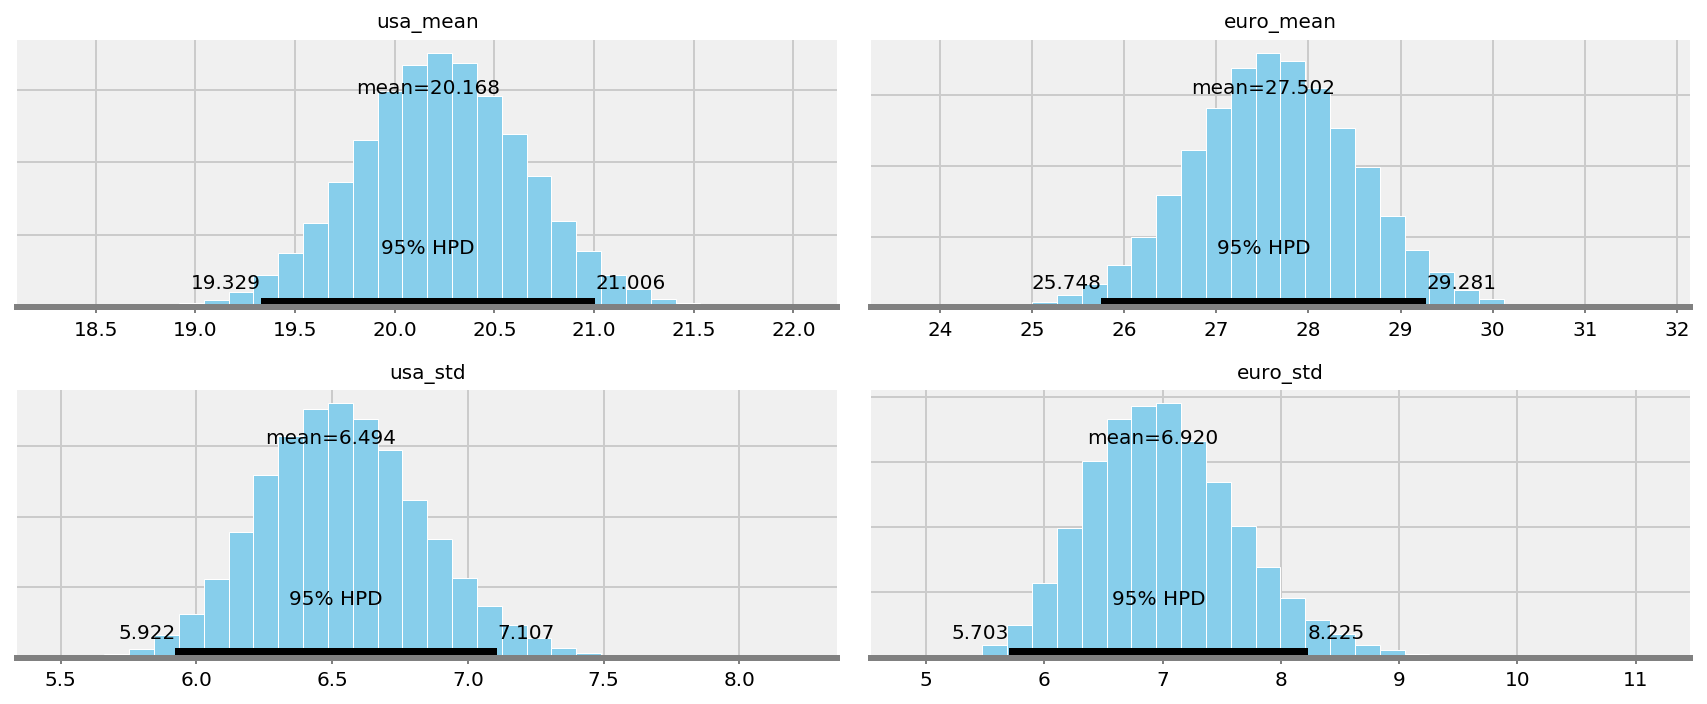

In [20]:
pm.plot_posterior(trace[5000::3],
                  varnames=['usa_mean', 'euro_mean',
                            'usa_std', 'euro_std'],
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1216e2810>,
      dtype=object)

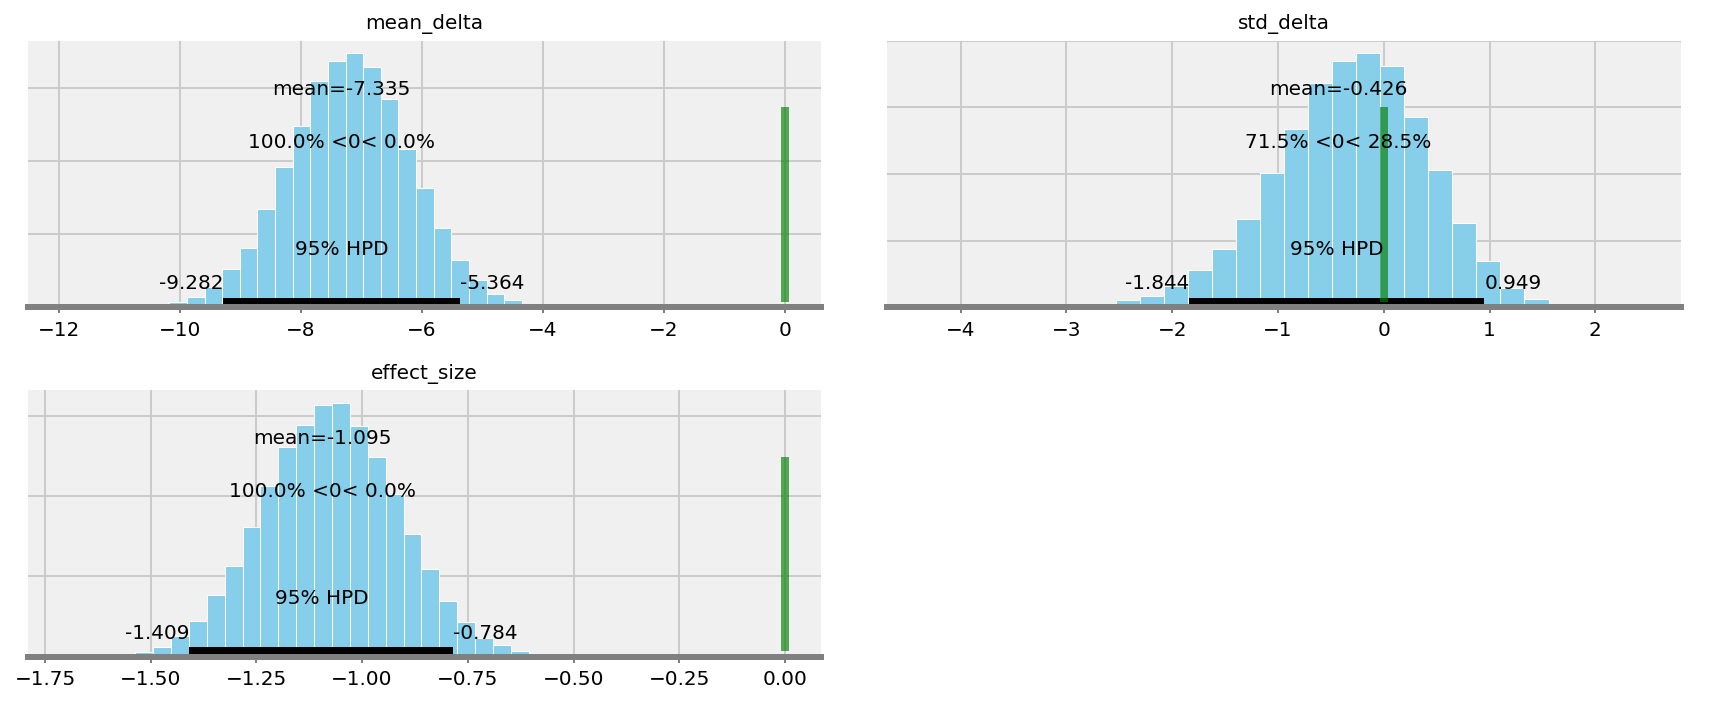

In [21]:
pm.plot_posterior(trace[5000::3],
                  varnames=['mean_delta','std_delta','effect_size'],
                  color='#87ceeb', ref_val=0)

### 4. Build a regression predicting MPG from predictors of your choice using `pymc3`.

You can construct the model at the granular level, or if you prefer use the patsy-formula model syntax (easier). Plot out the posterior distributions of your coefficients for your model.

In [22]:
auto.columns

Index([u'mpg', u'cylinders', u'displacement', u'horsepower', u'weight',
       u'acceleration', u'year', u'origin', u'name', u'maker', u'american',
       u'euro', u'asian'],
      dtype='object')

In [23]:
auto.mpg.mean()

23.44591836734694

In [24]:
X = auto[['cylinders','displacement','horsepower','weight','acceleration','year','american','euro','asian']]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs = ss.fit_transform(X)
Xs = pd.DataFrame(Xs, columns=X.columns)

In [ ]:
with pm.Model() as reg:
    mpg_std = pm.Uniform('error_std', lower=0.0001, upper=auto.mpg.var())
    
    intercept = pm.Normal('intercept', mu=0., sd=100.)
    cyl_beta = pm.Normal('cyl_beta', mu=0., sd=auto.mpg.var())
    disp_beta = pm.Normal('disp_beta', mu=0., sd=auto.mpg.var())
    horse_beta = pm.Normal('horse_beta', mu=0., sd=auto.mpg.var())
    weight_beta = pm.Normal('weight_beta', mu=0., sd=auto.mpg.var())
    acc_beta = pm.Normal('acc_beta', mu=0., sd=auto.mpg.var())
    year_beta = pm.Normal('year_beta', mu=0., sd=auto.mpg.var())
    usa_beta = pm.Normal('usa_beta', mu=0., sd=auto.mpg.var())
    euro_beta = pm.Normal('euro_beta', mu=0., sd=auto.mpg.var())
    asian_beta = pm.Normal('asian_beta', mu=0., sd=auto.mpg.var())
    
    E_mpg = pm.Normal('y_mean', 
                      mu=(intercept +
                          Xs.cylinders.values * cyl_beta +
                          Xs.displacement.values * disp_beta +
                          Xs.horsepower.values * horse_beta +
                          Xs.weight.values * weight_beta +
                          Xs.acceleration.values * acc_beta +
                          Xs.year.values * year_beta +
                          Xs.american.values * usa_beta + 
                          Xs.euro.values * euro_beta +
                          Xs.asian.values * asian_beta),
                      sd=mpg_std, observed=auto.mpg.values)
    

In [ ]:
with reg:
    step = pm.NUTS()
    start = pm.find_MAP()
    trace = pm.sample(50000, step=step, start=start, njobs=4)

logp = -1,081.6, ||grad|| = 0.27534: 100%|██████████| 71/71 [00:00<00:00, 404.54it/s]  
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [asian_beta, euro_beta, usa_beta, year_beta, acc_beta, weight_beta, horse_beta, disp_beta, cyl_beta, intercept, error_std_interval__]


In [ ]:
plt.figure(figsize=(7,21))
pm.traceplot(trace[5000::3])
plt.tight_layout()